<a href="https://colab.research.google.com/github/bagusamandira/Text-Modeling/blob/main/Text-Classification-Machine-Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from wordcloud import WordCloud
from nltk.corpus import stopwords, words
from nltk.tokenize import WordPunctTokenizer, word_tokenize
from string import punctuation
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
import string
from google.colab import files
import regex

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Import Dataset

In [ ]:
# Import Dataset
df_raw = pd.read_csv('/content/ecommerceDataset.csv', names=['label', 'teks'], engine='python')

## 1. Bentuk Raw Data

In [ ]:
# Raw Data
df_raw

,label,teks
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...
...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou..."


## 2. Preprocessing Data (Raw Data vs Clean Data)

In [ ]:
# Cek jumlah data kosong
df_raw.isna().sum()

label    0
teks     1
dtype: int64

In [ ]:
# Hapus Data Kosong
df = df_raw.dropna()
df.isna().sum()

label    0
teks     0
dtype: int64

In [ ]:
# Hapus Punctuation
def punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
df['Clean_teks'] = df['teks'].apply(punctuation)

<ipython-input-8-05261d0d1a56>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_teks'] = df['teks'].apply(punctuation)


In [ ]:
# Hapus Stopwords
en_stopwords = stopwords.words('english')
def remove_stopwords(text):
    words = word_tokenize(text)
    words_without_stopwords = [word for word in words if word.lower() not in en_stopwords]
    return ' '.join(words_without_stopwords)

df['Clean_teks'] = df['Clean_teks'].apply(remove_stopwords)


<ipython-input-9-37bdbb329eb5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_teks'] = df['Clean_teks'].apply(remove_stopwords)


In [ ]:
# Tokenization
def tokenize(text):
    return word_tokenize(text)

df['Clean_teks'] = df['Clean_teks'].apply(tokenize)

<ipython-input-10-21d6d6659af2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_teks'] = df['Clean_teks'].apply(tokenize)


In [ ]:
# Lemmatization
word_lemmatizer = WordNetLemmatizer()

def lemmatize_text(tokens):
    lemmatized_words = [word_lemmatizer.lemmatize(word) for word in tokens]
    return lemmatized_words

df['Clean_teks'] = df['Clean_teks'].apply(lemmatize_text)

<ipython-input-11-bcf3fafd5888>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Clean_teks'] = df['Clean_teks'].apply(lemmatize_text)


In [ ]:
# Raw Data vs Clean Data
df

,label,teks,Clean_teks
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","[SAF, Floral, Framed, Painting, Wood, 30, inch..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,"[SAF, UV, Textured, Modern, Art, Print, Framed..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","[SAF, Flower, Print, Framed, Painting, Synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt..."
...,...,...,...
50420,Electronics,Strontium MicroSD Class 10 8GB Memory Card (Bl...,"[Strontium, MicroSD, Class, 10, 8GB, Memory, C..."
50421,Electronics,CrossBeats Wave Waterproof Bluetooth Wireless ...,"[CrossBeats, Wave, Waterproof, Bluetooth, Wire..."
50422,Electronics,Karbonn Titanium Wind W4 (White) Karbonn Titan...,"[Karbonn, Titanium, Wind, W4, White, Karbonn, ..."
50423,Electronics,"Samsung Guru FM Plus (SM-B110E/D, Black) Colou...","[Samsung, Guru, FM, Plus, SMB110ED, Black, Col..."


## 3. EDA (Word Cloud, perbandingan jumlah kelas)

In [ ]:
# Pisahkan masing-masing kategori untuk membuat Word Cloud
household_content = " ".join([str(text) for text in df[df['label'] == 'Household']['Clean_teks']])
books_content = " ".join([str(text) for text in df[df['label'] == 'Books']['Clean_teks']])
electronics_content = " ".join([str(text) for text in df[df['label'] == 'Electronics']['Clean_teks']])
clothing_content = " ".join([str(text) for text in df[df['label'] == 'Clothing & Accessories']['Clean_teks']])

contents = [household_content, books_content, electronics_content, clothing_content]

In [ ]:
# Function Word Cloud
def gen_wordcloud(content):
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(content)
    return wordcloud

(-0.5, 799.5, 799.5, -0.5)

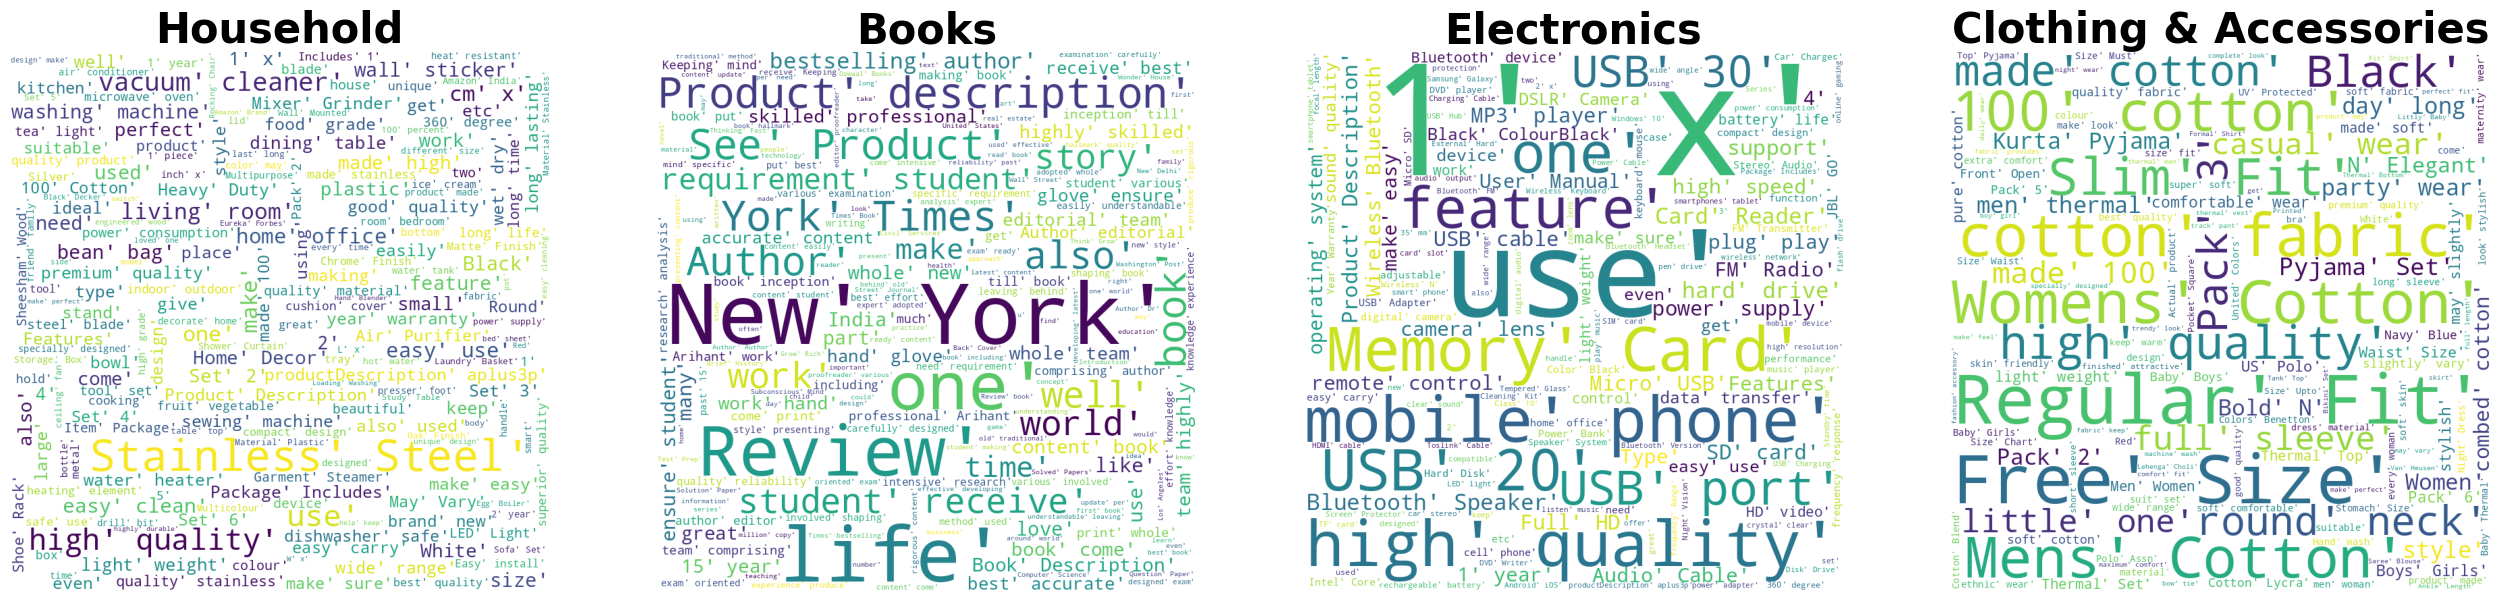

In [ ]:
# Plot Word Cloud
fig, axs = plt.subplots(1, 4, figsize= (32,16), facecolor= None)

household_wordcloud = gen_wordcloud(household_content)
axs[0].imshow(household_wordcloud)
axs[0].set_title('Household', fontweight="bold", size=30)
axs[0].axis("off")

books_wordcloud = gen_wordcloud(books_content)
axs[1].imshow(books_wordcloud)
axs[1].set_title('Books', fontweight="bold", size=30)
axs[1].axis("off")

electronic_wordcloud = gen_wordcloud(electronics_content)
axs[2].imshow(electronic_wordcloud)
axs[2].set_title('Electronics', fontweight="bold", size=30)
axs[2].axis("off")

clothes_wordcloud = gen_wordcloud(clothing_content)
axs[3].imshow(clothes_wordcloud)
axs[3].set_title('Clothing & Accessories', fontweight="bold", size=30)
axs[3].axis("off")

In [ ]:
# Perbandingan jumlah kelas
df['label'].value_counts()

label
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

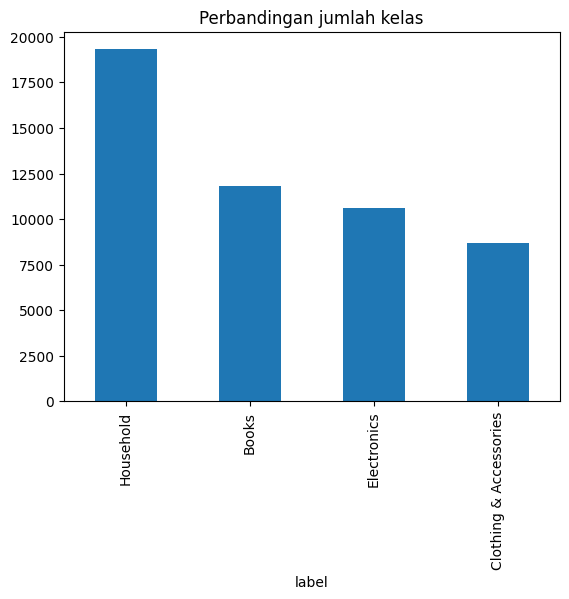

In [ ]:
# Perbandingan jumlah kelas dalam bentuk plot
df['label'].value_counts().plot.bar()
plt.title('Perbandingan jumlah kelas')
plt.show()

## 4. Representasi Text (TFIDF/embedding)

In [ ]:
# Word2vec
word2vec = Word2Vec(sentences=df['Clean_teks'], vector_size=50, min_count=3)
vector = word2vec.wv

In [ ]:
# Melihat representasi teks sebagai vektor untuk dimasukkan model
for word in vector.index_to_key:
  vectors = vector.get_vector(word)
  print(word)
  print(vectors)

Streaming output truncated to the last 5000 lines.
 -0.14556205 -0.05694036 -0.08119797  0.05639816  0.1372544  -0.02452859
  0.01048996  0.04107666 -0.12043595  0.05934074 -0.09017901 -0.07933253
  0.02567771  0.01367578 -0.02061438 -0.03801505  0.00084518  0.052262
  0.02631115  0.08208368  0.05456267  0.09541971 -0.13627481  0.06529393
 -0.12294658  0.14866686  0.08651765  0.08367688  0.01971296 -0.04288338
  0.0810507   0.01610693]
55ft
[ 0.04368247  0.01485575 -0.0490651  -0.04055297  0.01304025 -0.04451772
 -0.02048146  0.06692582 -0.07868402  0.00047988 -0.01685122 -0.00564271
 -0.09136205 -0.02767892 -0.01974243 -0.05131326  0.00595518  0.02865377
 -0.045791   -0.05396743 -0.06361883 -0.05370171  0.09380872 -0.04482624
  0.05272803 -0.01944735 -0.05635962 -0.04134325 -0.06903994  0.0197944
  0.00210728  0.01881521 -0.04259066 -0.01012375 -0.03872226  0.02212748
  0.07007879 -0.00542611 -0.03670539  0.00107863 -0.04110531  0.00321575
 -0.09745254  0.01356556 -0.01300808  0.06389

## 5. Text Modeling

In [ ]:
#Siapkan data untuk modeling
def document_vector(doc):
    doc = [word for word in doc if word in vector.index_to_key]
    if len(doc) >= 1:
        return np.mean(vector[doc], axis=0)
    else:
        return np.zeros(vector.vector_size)
df['doc_vector'] = df['Clean_teks'].apply(document_vector)

#Tentukan x dan y
X = np.array(list(df['doc_vector']))
y = df['label']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<ipython-input-21-ea9742bca40d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['doc_vector'] = df['Clean_teks'].apply(document_vector)


In [ ]:
# Fitting model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict dengan model SVM
svm_pred = svm_model.predict(X_test)

In [ ]:
#Fitting model random forest
randomforest_model= RandomForestClassifier(n_estimators=10, max_depth=100)
randomforest_model.fit(X_train, y_train)

#Predict dengan model random forest
randomforest_pred = randomforest_model.predict(X_test)

## 6. Evaluasi Model

In [ ]:
# Evaluasi model SVM
print('Classification report using SVM')
print(classification_report(y_test, svm_pred))

Classification report using SVM
                        precision    recall  f1-score   support

                 Books       0.94      0.92      0.93      2378
Clothing & Accessories       0.90      0.89      0.89      1750
           Electronics       0.91      0.85      0.88      2082
             Household       0.87      0.92      0.90      3875

              accuracy                           0.90     10085
             macro avg       0.90      0.89      0.90     10085
          weighted avg       0.90      0.90      0.90     10085



In [ ]:
# Evaluasi model Random Forest Classifier
print('Classification report using Random Forest Classifier')
print(classification_report(y_test, randomforest_pred))

Classification report using Random Forest Classifier
                        precision    recall  f1-score   support

                 Books       0.98      0.97      0.97      2378
Clothing & Accessories       0.95      0.94      0.95      1750
           Electronics       0.96      0.94      0.95      2082
             Household       0.94      0.96      0.95      3875

              accuracy                           0.96     10085
             macro avg       0.96      0.95      0.96     10085
          weighted avg       0.96      0.96      0.96     10085



Seperti yang bisa dilihat, model yang lebih bagus adalah *Random Forest Classifier* karena memiliki nilai *metrics* yang lebih tinggi dari *SVM*.